In [1]:
from causalimpact import CausalImpact
import pandas as pd
import yfinance as yf

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
with open('./thailand_stocks.txt', 'r') as file:
    list_of_stocks = file.read().split(', ')

In [4]:
list_of_stocks[:10]

['EE.bk',
 'GFPT.bk',
 'LEE.bk',
 'MAX.bk',
 'NER.bk',
 'PPPM.bk',
 'STA.bk',
 'TEGH.bk',
 'TFM.bk',
 'TRUBB.bk']

In [5]:
len(list_of_stocks)

673

In [6]:
'GULF.bk' in list_of_stocks

True

In [7]:
df = yf.download(tickers=list_of_stocks,
           start='2023-01-01',
           end='2023-05-25',
           interval='1d',
           auto_adjust=True)

[*********************100%***********************]  673 of 673 completed

7 Failed downloads:
- PRO.BK: No data found, symbol may be delisted
- IFEC.BK: No data found, symbol may be delisted
- DTAC.BK: No data found, symbol may be delisted
- U.BK: No data found, symbol may be delisted
- SVH.BK: No data found, symbol may be delisted
- THL.BK: No data found, symbol may be delisted
- JWD.BK: No data found, symbol may be delisted


In [8]:
df_na = df['Close']

<AxesSubplot:>

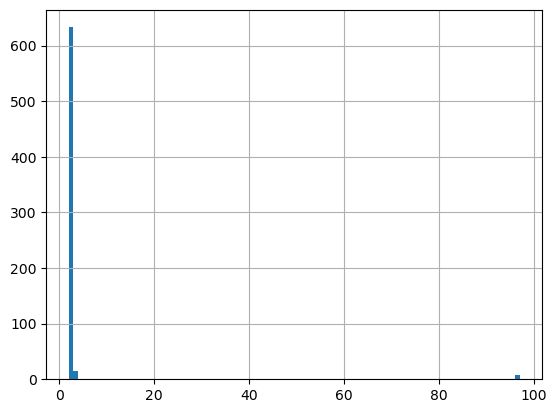

In [9]:
df_na.isna().sum().sort_values().hist(bins=100)

In [10]:
df_na.head()

,2S.BK,3K-BAT.BK,7UP.BK,A.BK,AAI.BK,AAV.BK,ABPIF.BK,ACC.BK,ACE.BK,ACG.BK,...,WHART.BK,WHAUP.BK,WICE.BK,WIIK.BK,WIN.BK,WORK.BK,WP.BK,WPH.BK,XPG.BK,ZEN.BK
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03 00:00:00,2.877857,62.5,0.79,4.98,6.791285,3.08,0.54,1.13,2.68,1.496338,...,10.493797,4.013814,9.696000,1.671008,1.05,18.364887,4.248884,3.966666,1.42,16.636097
2023-01-04 00:00:00,2.915476,62.5,0.86,4.98,6.646789,3.04,0.54,1.10,2.66,1.506248,...,10.493797,4.072268,9.599999,1.652337,1.02,18.364887,4.286652,3.966666,1.43,16.636097
2023-01-05 00:00:00,2.934286,63.0,0.77,4.94,6.454128,3.08,0.54,1.13,2.66,1.506248,...,10.396633,4.150207,9.360000,1.661672,1.04,18.166348,4.267768,4.005555,1.42,16.537073
2023-01-06 00:00:00,2.934286,63.0,0.75,4.98,6.116972,3.08,0.54,1.11,2.66,1.496338,...,10.396633,4.150207,9.552000,1.652337,1.03,18.265617,4.248884,3.986111,1.43,16.735123
2023-01-09 00:00:00,2.971905,63.0,0.74,4.98,6.261468,3.08,0.54,1.14,2.64,1.506248,...,10.493797,4.091753,9.696000,1.652337,1.03,18.464157,4.248884,4.083333,1.44,16.735123


In [11]:
df_clean_na = df_na.loc[:, df_na.isna().sum() <= 2].dropna()

In [12]:
df_clean_na.head()

,2S.BK,3K-BAT.BK,7UP.BK,A.BK,AAI.BK,AAV.BK,ACC.BK,ACE.BK,ACG.BK,ADVANC.BK,...,WHART.BK,WHAUP.BK,WICE.BK,WIIK.BK,WIN.BK,WORK.BK,WP.BK,WPH.BK,XPG.BK,ZEN.BK
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03 00:00:00,2.877857,62.5,0.79,4.98,6.791285,3.08,1.13,2.68,1.496338,190.572952,...,10.493797,4.013814,9.696000,1.671008,1.05,18.364887,4.248884,3.966666,1.42,16.636097
2023-01-04 00:00:00,2.915476,62.5,0.86,4.98,6.646789,3.04,1.10,2.66,1.506248,193.022476,...,10.493797,4.072268,9.599999,1.652337,1.02,18.364887,4.286652,3.966666,1.43,16.636097
2023-01-05 00:00:00,2.934286,63.0,0.77,4.94,6.454128,3.08,1.13,2.66,1.506248,196.941711,...,10.396633,4.150207,9.360000,1.661672,1.04,18.166348,4.267768,4.005555,1.42,16.537073
2023-01-06 00:00:00,2.934286,63.0,0.75,4.98,6.116972,3.08,1.11,2.66,1.496338,196.941711,...,10.396633,4.150207,9.552000,1.652337,1.03,18.265617,4.248884,3.986111,1.43,16.735123
2023-01-09 00:00:00,2.971905,63.0,0.74,4.98,6.261468,3.08,1.14,2.64,1.506248,198.901337,...,10.493797,4.091753,9.696000,1.652337,1.03,18.464157,4.248884,4.083333,1.44,16.735123


In [13]:
df_clean_na.index = pd.to_datetime(df_clean_na.index).tz_localize(None)

In [14]:
df_clean_na.head()

,2S.BK,3K-BAT.BK,7UP.BK,A.BK,AAI.BK,AAV.BK,ACC.BK,ACE.BK,ACG.BK,ADVANC.BK,...,WHART.BK,WHAUP.BK,WICE.BK,WIIK.BK,WIN.BK,WORK.BK,WP.BK,WPH.BK,XPG.BK,ZEN.BK
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03,2.877857,62.5,0.79,4.98,6.791285,3.08,1.13,2.68,1.496338,190.572952,...,10.493797,4.013814,9.696000,1.671008,1.05,18.364887,4.248884,3.966666,1.42,16.636097
2023-01-04,2.915476,62.5,0.86,4.98,6.646789,3.04,1.10,2.66,1.506248,193.022476,...,10.493797,4.072268,9.599999,1.652337,1.02,18.364887,4.286652,3.966666,1.43,16.636097
2023-01-05,2.934286,63.0,0.77,4.94,6.454128,3.08,1.13,2.66,1.506248,196.941711,...,10.396633,4.150207,9.360000,1.661672,1.04,18.166348,4.267768,4.005555,1.42,16.537073
2023-01-06,2.934286,63.0,0.75,4.98,6.116972,3.08,1.11,2.66,1.496338,196.941711,...,10.396633,4.150207,9.552000,1.652337,1.03,18.265617,4.248884,3.986111,1.43,16.735123
2023-01-09,2.971905,63.0,0.74,4.98,6.261468,3.08,1.14,2.64,1.506248,198.901337,...,10.493797,4.091753,9.696000,1.652337,1.03,18.464157,4.248884,4.083333,1.44,16.735123


In [15]:
y = df_clean_na.loc[:, 'GULF.BK']
X = df_clean_na.drop(columns=['GULF.BK'])

In [16]:
# Combine everything
df = pd.concat([y, X], axis=1).dropna()
df.head()

,GULF.BK,2S.BK,3K-BAT.BK,7UP.BK,A.BK,AAI.BK,AAV.BK,ACC.BK,ACE.BK,ACG.BK,...,WHART.BK,WHAUP.BK,WICE.BK,WIIK.BK,WIN.BK,WORK.BK,WP.BK,WPH.BK,XPG.BK,ZEN.BK
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03,54.371426,2.877857,62.5,0.79,4.98,6.791285,3.08,1.13,2.68,1.496338,...,10.493797,4.013814,9.696000,1.671008,1.05,18.364887,4.248884,3.966666,1.42,16.636097
2023-01-04,54.618568,2.915476,62.5,0.86,4.98,6.646789,3.04,1.10,2.66,1.506248,...,10.493797,4.072268,9.599999,1.652337,1.02,18.364887,4.286652,3.966666,1.43,16.636097
2023-01-05,54.865711,2.934286,63.0,0.77,4.94,6.454128,3.08,1.13,2.66,1.506248,...,10.396633,4.150207,9.360000,1.661672,1.04,18.166348,4.267768,4.005555,1.42,16.537073
2023-01-06,54.865711,2.934286,63.0,0.75,4.98,6.116972,3.08,1.11,2.66,1.496338,...,10.396633,4.150207,9.552000,1.652337,1.03,18.265617,4.248884,3.986111,1.43,16.735123
2023-01-09,54.865711,2.971905,63.0,0.74,4.98,6.261468,3.08,1.14,2.64,1.506248,...,10.493797,4.091753,9.696000,1.652337,1.03,18.464157,4.248884,4.083333,1.44,16.735123


In [17]:
df_training = df.loc[df.index <= '2023-05-14']

In [18]:
df_training.tail()

,GULF.BK,2S.BK,3K-BAT.BK,7UP.BK,A.BK,AAI.BK,AAV.BK,ACC.BK,ACE.BK,ACG.BK,...,WHART.BK,WHAUP.BK,WICE.BK,WIIK.BK,WIN.BK,WORK.BK,WP.BK,WPH.BK,XPG.BK,ZEN.BK
Date,,,,,,,,,,,,,,,,,,,,,
2023-05-08,53.25,2.96,54.00,0.58,5.0,4.70,2.74,1.15,2.06,1.50,...,10.810225,3.86,8.55,1.69,0.79,16.000000,4.23,3.50,1.07,14.1
2023-05-09,53.25,3.00,56.25,0.59,5.0,4.82,2.76,1.13,2.14,1.53,...,11.006775,3.98,8.95,1.70,0.83,16.299999,4.24,3.52,1.07,14.6
2023-05-10,52.50,3.00,56.25,0.60,5.0,4.82,2.76,1.17,2.12,1.52,...,10.908501,3.88,8.90,1.69,0.87,16.299999,4.24,3.54,1.08,14.5
2023-05-11,52.50,2.98,56.25,0.59,5.0,4.72,2.72,1.25,2.10,1.47,...,11.006775,3.92,9.00,1.70,0.85,16.299999,4.18,3.48,1.04,14.3
2023-05-12,52.50,3.06,53.75,0.59,5.0,4.60,2.84,1.21,2.10,1.54,...,11.105049,3.88,8.85,1.70,0.86,16.299999,4.30,3.72,1.05,13.9


In [19]:
# Differencing: Subtract or divide
differencing = df_training.pct_change().dropna()
differencing.head()

,GULF.BK,2S.BK,3K-BAT.BK,7UP.BK,A.BK,AAI.BK,AAV.BK,ACC.BK,ACE.BK,ACG.BK,...,WHART.BK,WHAUP.BK,WICE.BK,WIIK.BK,WIN.BK,WORK.BK,WP.BK,WPH.BK,XPG.BK,ZEN.BK
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-04,0.004545,0.013072,0.000,0.088608,0.000000,-0.021277,-0.012987,-0.026549,-0.007463,0.006623,...,0.000000,0.014563,-0.009901,-0.011173,-0.028571,0.000000,0.008889,0.000000,0.007042,0.000000
2023-01-05,0.004525,0.006452,0.008,-0.104651,-0.008032,-0.028986,0.013158,0.027273,0.000000,0.000000,...,-0.009259,0.019139,-0.025000,0.005650,0.019608,-0.010811,-0.004405,0.009804,-0.006993,-0.005952
2023-01-06,0.000000,0.000000,0.000,-0.025974,0.008097,-0.052239,0.000000,-0.017699,0.000000,-0.006579,...,0.000000,0.000000,0.020513,-0.005618,-0.009615,0.005464,-0.004425,-0.004854,0.007042,0.011976
2023-01-09,0.000000,0.012821,0.000,-0.013333,0.000000,0.023622,0.000000,0.027027,-0.007519,0.006623,...,0.009346,-0.014085,0.015075,0.000000,0.000000,0.010870,0.000000,0.024390,0.006993,0.000000
2023-01-10,-0.009009,0.012658,0.000,0.081081,0.000000,0.038462,-0.012987,0.000000,0.022727,0.006579,...,-0.009259,0.000000,0.019802,0.011299,0.009709,-0.005376,0.008889,-0.019048,0.000000,-0.005917


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
corr = differencing.corr()
top_corr = corr['GULF.BK'].sort_values(ascending=False)[:11]

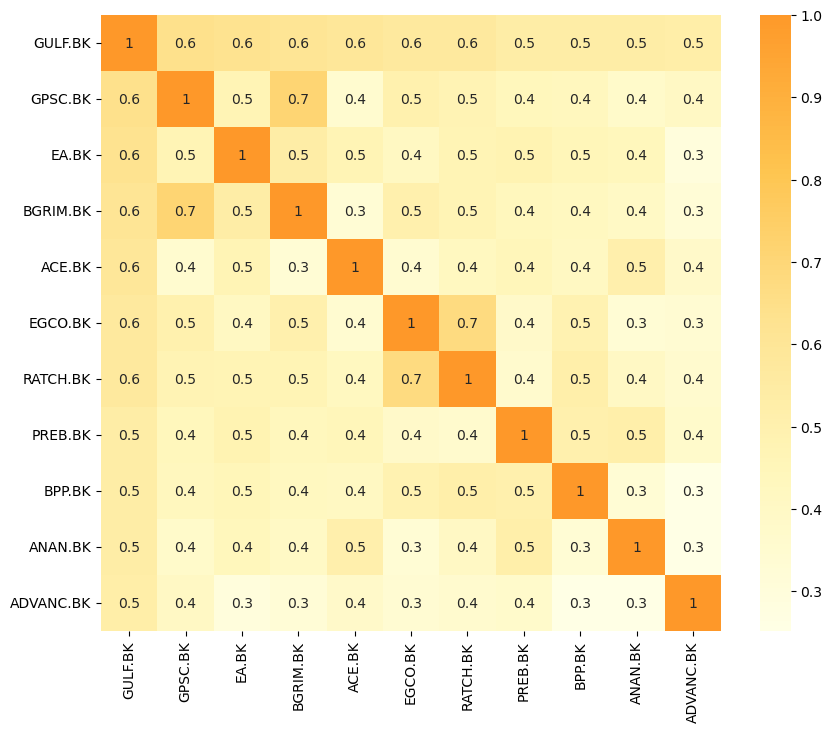

In [22]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data=corr.loc[top_corr.index, top_corr.index],
            annot=True,
            cmap='YlOrBr',
            fmt='.1g',
            center=True)
plt.savefig('corr.png')

In [23]:
df = df.loc[:, top_corr.index]

In [24]:
training_start = '2023-01-04'
training_end = '2023-05-12'
treatment_start = '2023-05-15'
treatment_end = '2023-05-24'
# Pre and post period
pre_period = [training_start, training_end]
post_period = [treatment_start, treatment_end]

In [25]:
# Causal impact model
impact = CausalImpact(data=df, pre_period=pre_period, post_period=post_period)

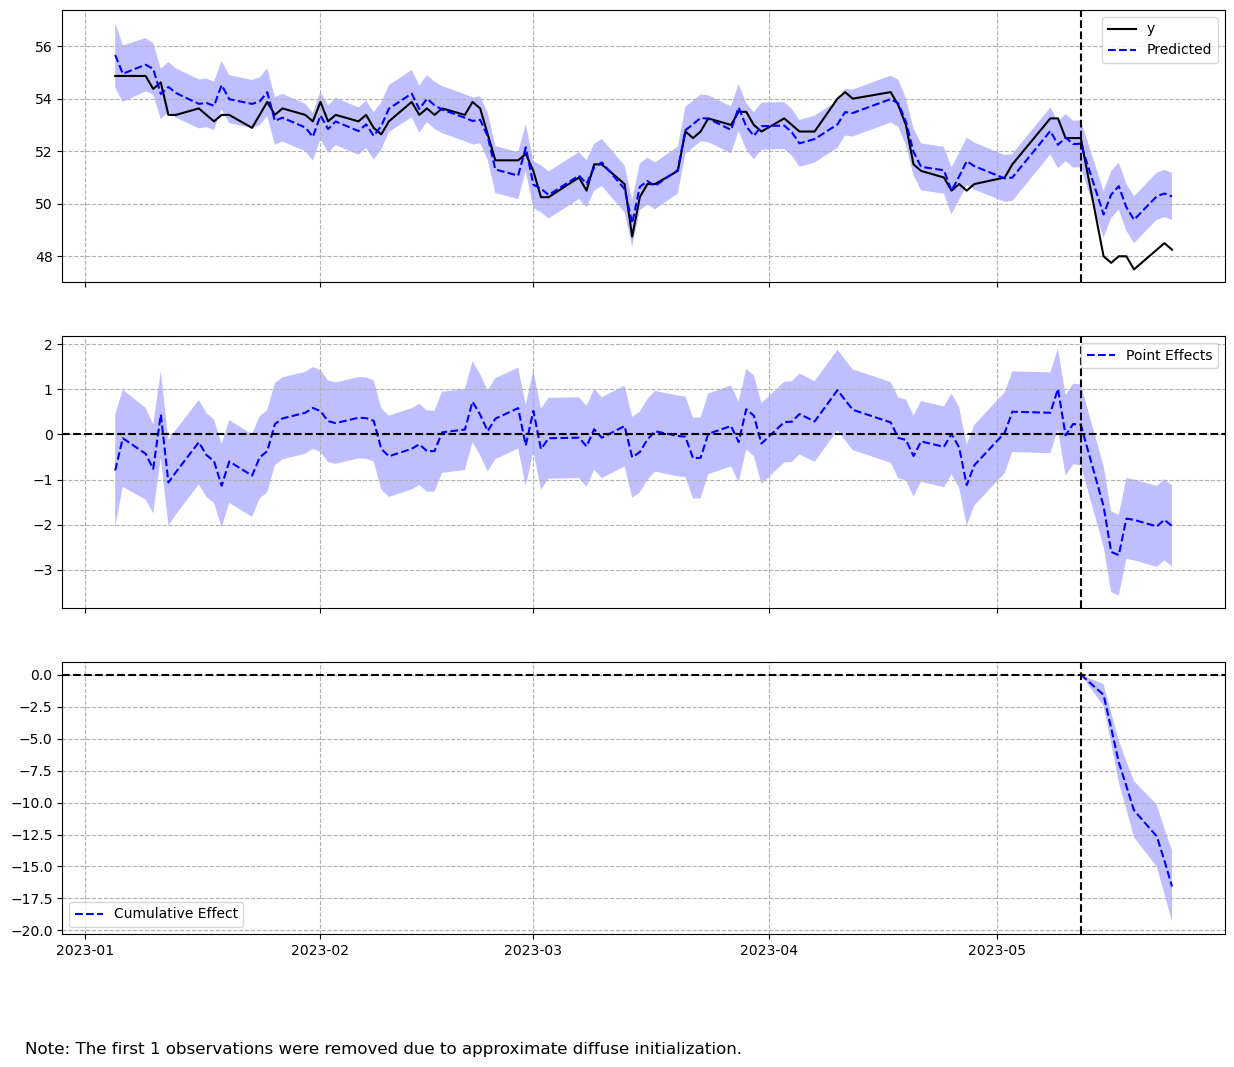

In [26]:
# Visualization
impact.plot()

In [27]:
# Causal impact summary
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    48.03              384.25
Prediction (s.d.)         50.1 (0.18)        400.82 (1.42)
95% CI                    [49.75, 50.45]     [397.99, 403.56]

Absolute effect (s.d.)    -2.07 (0.18)       -16.57 (1.42)
95% CI                    [-2.41, -1.72]     [-19.31, -13.74]

Relative effect (s.d.)    -4.13% (0.35%)     -4.13% (0.35%)
95% CI                    [-4.82%, -3.43%]   [-4.82%, -3.43%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [28]:
# Causal impact report
print(impact.summary(output='report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 48.03. By contrast, in the absence of an
intervention, we would have expected an average response of 50.1.
The 95% interval of this counterfactual prediction is [49.75, 50.45].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -2.07 with a 95% interval of
[-2.41, -1.72]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 384.25.
By contrast, had the intervention not taken place, we would have expected
a sum of 400.82. The 95% interval of this prediction is [397.99, 403.56].


The above results are given in terms of absolute numbers. In relative
terms, the response variabl